# Predicting Tesla Stocks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [2]:
tes=pd.read_csv("tesla.csv")

In [3]:
tes.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tes.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
2192,15-03-2019,283.510010,283.723999,274.399994,275.429993,275.429993,14758243


In [5]:
tes.shape

(2193, 7)

In [6]:
tes.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
tes.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [8]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [9]:
tes.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
tes.duplicated().any(axis=0)

False

In [11]:
tes1=tes.reset_index()["Close"]

In [12]:
tes1.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

In [13]:
tes1.shape

(2193,)

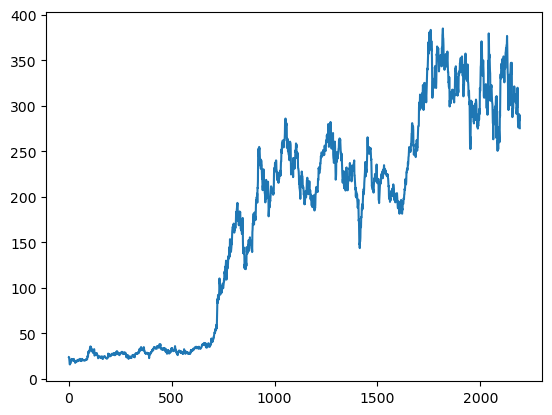

In [14]:
plt.plot(tes1)
plt.show()

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
tes1=scaler.fit_transform(np.array(tes1).reshape(-1,1))

In [16]:
tes1

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.73986996],
       [0.74257852],
       [0.70322317]])

In [17]:
len(tes1)

2193

In [18]:
#splitting dataset into train test and split
training_size=int(len(tes1)*0.65)
test_size=len(tes1)-training_size
train_data,test_data=tes1[0:training_size,:],tes1[training_size:len(tes1),:1]

In [19]:
training_size,test_size

(1425, 768)

In [20]:
train_data

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.43718853],
       [0.44203684],
       [0.46486997]])

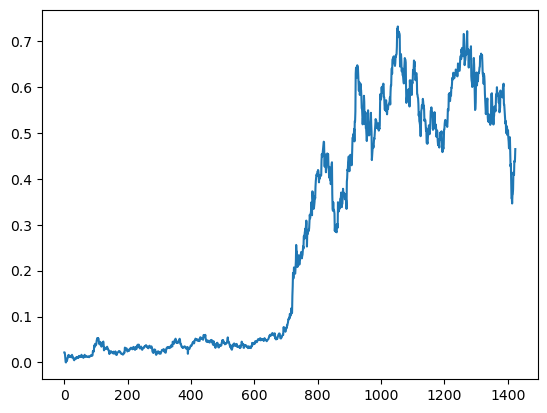

In [21]:
plt.plot(train_data)
plt.show()

In [22]:
test_data

array([[0.47275189],
       [0.47705849],
       [0.46194476],
       [0.46733477],
       [0.48737813],
       [0.50173346],
       [0.51324483],
       [0.50595885],
       [0.52253521],
       [0.51294689],
       [0.51923077],
       [0.53995123],
       [0.54859154],
       [0.55831526],
       [0.57036838],
       [0.58759481],
       [0.60270858],
       [0.59165765],
       [0.56007585],
       [0.57407909],
       [0.58087756],
       [0.58052547],
       [0.57174973],
       [0.57955039],
       [0.6007313 ],
       [0.62619178],
       [0.64916035],
       [0.67611054],
       [0.65384619],
       [0.63453415],
       [0.63412784],
       [0.62843989],
       [0.6466143 ],
       [0.63938245],
       [0.64656012],
       [0.64485375],
       [0.627221  ],
       [0.63426327],
       [0.62971287],
       [0.64450163],
       [0.63927413],
       [0.64447455],
       [0.63832611],
       [0.62814195],
       [0.60931743],
       [0.61213435],
       [0.58645722],
       [0.560

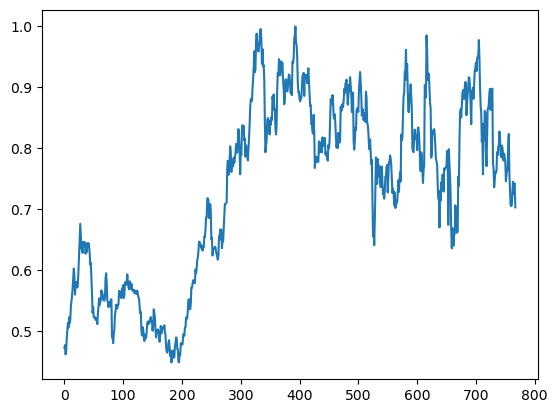

In [23]:
plt.plot(test_data)
plt.show()

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [25]:
#reshaping 
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [26]:
print(X_train.shape),print(y_train.shape)

(1324, 100)
(1324,)


(None, None)

In [27]:
print(X_test.shape),print(y_test.shape)

(667, 100)
(667,)


(None, None)

In [28]:
#reshape imput
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 21s 451ms/step - loss: 0.0266 - val_loss: 0.0045
Epoch 2/100
21/21 [==============================] - 7s 323ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 3/100
21/21 [==============================] - 6s 310ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 4/100
21/21 [==============================] - 6s 306ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 5/100
21/21 [==============================] - 6s 307ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 6/100
21/21 [==============================] - 7s 314ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 7/100
21/21 [==============================] - 6s 308ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 8/100
21/21 [==============================] - 6s 310ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 9/100
21/21 [==============================] - 6s 309ms/step - loss: 9.8935e-04 - val_loss: 0.0062
Epoch 10/100
21/21 [==============================] - 7s 327ms/step - loss: 9.3862e-04

KeyboardInterrupt: 

In [33]:
#prediction and performance check
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


21/21 [==============================] - 1s 60ms/step


In [35]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
math.sqrt(mean_squared_error(y_train,train_predict))

57672.466141205594

In [37]:
math.sqrt(mean_squared_error(y_test,test_predict))

106138.02602221422

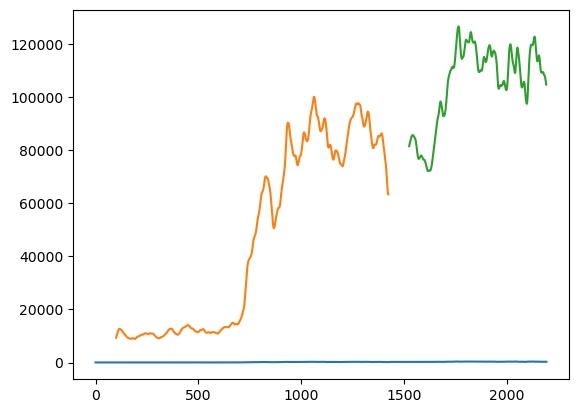

In [39]:
#plotting
look_back=100
trainPredictPlot=np.empty_like(tes1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=np.empty_like(tes1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tes1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(tes1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

768

In [42]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 428)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.9122968445287107,
 0.843147334777898,
 0.7936890222101842,
 0.8055796343445287,
 0.8132448212351029,
 0.8434994609967498,
 0.8497291143011918,
 0.8331798591549296,
 0.8450162486457204,
 0.8227790005417117,
 0.8462621614301191,
 0.8381907096424702,
 0.8508126029252437,
 0.8466955417118093,
 0.8849403819068256,
 0.8770314355362947,
 0.8885428114842904,
 0.8631094014084507,
 0.8647616657638135,
 0.8333423645720477,
 0.8227790005417117,
 0.8398971153846154,
 0.8973185157096424,
 0.9239165872156013,
 0.9192037188515709,
 0.946424704767064,
 0.9418472345612133,
 0.9198266359696641,
 0.9265167795232936,
 0.9425785157096425,
 0.9385969312026002,
 0.9401679414951246,
 0.9104009019501624,
 0.8983206690140845,
 0.8723184859154929,
 0.8817714138678223,
 0.9127031121343445,
 0.9131364924160347,
 0.8999187107258938,
 0.8934452979414952,
 0.8980497968580715,
 0.9138136321776815,
 0.9211809154929577,
 0.9198266359696641,
 0.9040899133261104,
 0.8903846126760563,
 0.9068526137594799,
 0.887323927410

In [60]:
#demostrating prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=427
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

0 day input [0.84314733 0.79368902 0.80557963 0.81324482 0.84349946 0.84972911
 0.83317986 0.84501625 0.822779   0.84626216 0.83819071 0.8508126
 0.84669554 0.88494038 0.87703144 0.88854281 0.8631094  0.86476167
 0.83334236 0.822779   0.83989712 0.89731852 0.92391659 0.91920372
 0.9464247  0.94184723 0.91982664 0.92651678 0.94257852 0.93859693
 0.94016794 0.9104009  0.89832067 0.87231849 0.88177141 0.91270311
 0.91313649 0.89991871 0.8934453  0.8980498  0.91381363 0.92118092
 0.91982664 0.90408991 0.89038461 0.90685261 0.88732393 0.94228061
 0.93973456 0.94916038 0.98006505 0.98594257 1.         0.97318528
 0.96996209 0.94983752 0.90815275 0.89163053 0.89233478 0.88074215
 0.87703144 0.88109427 0.88225894 0.90016255 0.91877034 0.91963702
 0.92383533 0.88607801 0.92034127 0.91765982 0.92058503 0.92028713
 0.90682559 0.92077465 0.93133801 0.91010292 0.89192851 0.87004331
 0.87091007 0.83976164 0.84065551 0.82630009 0.82416031 0.85517335
 0.82686887 0.76776817 0.78626759 0.77730227 0.7861

2 day output [[0.71522564]]
3 day input [0.81324482 0.84349946 0.84972911 0.83317986 0.84501625 0.822779
 0.84626216 0.83819071 0.8508126  0.84669554 0.88494038 0.87703144
 0.88854281 0.8631094  0.86476167 0.83334236 0.822779   0.83989712
 0.89731852 0.92391659 0.91920372 0.9464247  0.94184723 0.91982664
 0.92651678 0.94257852 0.93859693 0.94016794 0.9104009  0.89832067
 0.87231849 0.88177141 0.91270311 0.91313649 0.89991871 0.8934453
 0.8980498  0.91381363 0.92118092 0.91982664 0.90408991 0.89038461
 0.90685261 0.88732393 0.94228061 0.93973456 0.94916038 0.98006505
 0.98594257 1.         0.97318528 0.96996209 0.94983752 0.90815275
 0.89163053 0.89233478 0.88074215 0.87703144 0.88109427 0.88225894
 0.90016255 0.91877034 0.91963702 0.92383533 0.88607801 0.92034127
 0.91765982 0.92058503 0.92028713 0.90682559 0.92077465 0.93133801
 0.91010292 0.89192851 0.87004331 0.87091007 0.83976164 0.84065551
 0.82630009 0.82416031 0.85517335 0.82686887 0.76776817 0.78626759
 0.77730227 0.78615923 0.

4 day output [[0.7109346]]
5 day input [0.84972911 0.83317986 0.84501625 0.822779   0.84626216 0.83819071
 0.8508126  0.84669554 0.88494038 0.87703144 0.88854281 0.8631094
 0.86476167 0.83334236 0.822779   0.83989712 0.89731852 0.92391659
 0.91920372 0.9464247  0.94184723 0.91982664 0.92651678 0.94257852
 0.93859693 0.94016794 0.9104009  0.89832067 0.87231849 0.88177141
 0.91270311 0.91313649 0.89991871 0.8934453  0.8980498  0.91381363
 0.92118092 0.91982664 0.90408991 0.89038461 0.90685261 0.88732393
 0.94228061 0.93973456 0.94916038 0.98006505 0.98594257 1.
 0.97318528 0.96996209 0.94983752 0.90815275 0.89163053 0.89233478
 0.88074215 0.87703144 0.88109427 0.88225894 0.90016255 0.91877034
 0.91963702 0.92383533 0.88607801 0.92034127 0.91765982 0.92058503
 0.92028713 0.90682559 0.92077465 0.93133801 0.91010292 0.89192851
 0.87004331 0.87091007 0.83976164 0.84065551 0.82630009 0.82416031
 0.85517335 0.82686887 0.76776817 0.78626759 0.77730227 0.78615923
 0.7816631  0.77787105 0.7778710

6 day output [[0.70709246]]
7 day input [0.84501625 0.822779   0.84626216 0.83819071 0.8508126  0.84669554
 0.88494038 0.87703144 0.88854281 0.8631094  0.86476167 0.83334236
 0.822779   0.83989712 0.89731852 0.92391659 0.91920372 0.9464247
 0.94184723 0.91982664 0.92651678 0.94257852 0.93859693 0.94016794
 0.9104009  0.89832067 0.87231849 0.88177141 0.91270311 0.91313649
 0.89991871 0.8934453  0.8980498  0.91381363 0.92118092 0.91982664
 0.90408991 0.89038461 0.90685261 0.88732393 0.94228061 0.93973456
 0.94916038 0.98006505 0.98594257 1.         0.97318528 0.96996209
 0.94983752 0.90815275 0.89163053 0.89233478 0.88074215 0.87703144
 0.88109427 0.88225894 0.90016255 0.91877034 0.91963702 0.92383533
 0.88607801 0.92034127 0.91765982 0.92058503 0.92028713 0.90682559
 0.92077465 0.93133801 0.91010292 0.89192851 0.87004331 0.87091007
 0.83976164 0.84065551 0.82630009 0.82416031 0.85517335 0.82686887
 0.76776817 0.78626759 0.77730227 0.78615923 0.7816631  0.77787105
 0.77787105 0.81148427 

8 day output [[0.703575]]
9 day input [0.84626216 0.83819071 0.8508126  0.84669554 0.88494038 0.87703144
 0.88854281 0.8631094  0.86476167 0.83334236 0.822779   0.83989712
 0.89731852 0.92391659 0.91920372 0.9464247  0.94184723 0.91982664
 0.92651678 0.94257852 0.93859693 0.94016794 0.9104009  0.89832067
 0.87231849 0.88177141 0.91270311 0.91313649 0.89991871 0.8934453
 0.8980498  0.91381363 0.92118092 0.91982664 0.90408991 0.89038461
 0.90685261 0.88732393 0.94228061 0.93973456 0.94916038 0.98006505
 0.98594257 1.         0.97318528 0.96996209 0.94983752 0.90815275
 0.89163053 0.89233478 0.88074215 0.87703144 0.88109427 0.88225894
 0.90016255 0.91877034 0.91963702 0.92383533 0.88607801 0.92034127
 0.91765982 0.92058503 0.92028713 0.90682559 0.92077465 0.93133801
 0.91010292 0.89192851 0.87004331 0.87091007 0.83976164 0.84065551
 0.82630009 0.82416031 0.85517335 0.82686887 0.76776817 0.78626759
 0.77730227 0.78615923 0.7816631  0.77787105 0.77787105 0.81148427
 0.79333698 0.80037917 0.

10 day output [[0.70030266]]
11 day input [0.8508126  0.84669554 0.88494038 0.87703144 0.88854281 0.8631094
 0.86476167 0.83334236 0.822779   0.83989712 0.89731852 0.92391659
 0.91920372 0.9464247  0.94184723 0.91982664 0.92651678 0.94257852
 0.93859693 0.94016794 0.9104009  0.89832067 0.87231849 0.88177141
 0.91270311 0.91313649 0.89991871 0.8934453  0.8980498  0.91381363
 0.92118092 0.91982664 0.90408991 0.89038461 0.90685261 0.88732393
 0.94228061 0.93973456 0.94916038 0.98006505 0.98594257 1.
 0.97318528 0.96996209 0.94983752 0.90815275 0.89163053 0.89233478
 0.88074215 0.87703144 0.88109427 0.88225894 0.90016255 0.91877034
 0.91963702 0.92383533 0.88607801 0.92034127 0.91765982 0.92058503
 0.92028713 0.90682559 0.92077465 0.93133801 0.91010292 0.89192851
 0.87004331 0.87091007 0.83976164 0.84065551 0.82630009 0.82416031
 0.85517335 0.82686887 0.76776817 0.78626759 0.77730227 0.78615923
 0.7816631  0.77787105 0.77787105 0.81148427 0.79333698 0.80037917
 0.80362947 0.81053626 0.7934

12 day output [[0.6972299]]
13 day input [0.88494038 0.87703144 0.88854281 0.8631094  0.86476167 0.83334236
 0.822779   0.83989712 0.89731852 0.92391659 0.91920372 0.9464247
 0.94184723 0.91982664 0.92651678 0.94257852 0.93859693 0.94016794
 0.9104009  0.89832067 0.87231849 0.88177141 0.91270311 0.91313649
 0.89991871 0.8934453  0.8980498  0.91381363 0.92118092 0.91982664
 0.90408991 0.89038461 0.90685261 0.88732393 0.94228061 0.93973456
 0.94916038 0.98006505 0.98594257 1.         0.97318528 0.96996209
 0.94983752 0.90815275 0.89163053 0.89233478 0.88074215 0.87703144
 0.88109427 0.88225894 0.90016255 0.91877034 0.91963702 0.92383533
 0.88607801 0.92034127 0.91765982 0.92058503 0.92028713 0.90682559
 0.92077465 0.93133801 0.91010292 0.89192851 0.87004331 0.87091007
 0.83976164 0.84065551 0.82630009 0.82416031 0.85517335 0.82686887
 0.76776817 0.78626759 0.77730227 0.78615923 0.7816631  0.77787105
 0.77787105 0.81148427 0.79333698 0.80037917 0.80362947 0.81053626
 0.79344526 0.81801191

14 day output [[0.69433105]]
15 day input [0.88854281 0.8631094  0.86476167 0.83334236 0.822779   0.83989712
 0.89731852 0.92391659 0.91920372 0.9464247  0.94184723 0.91982664
 0.92651678 0.94257852 0.93859693 0.94016794 0.9104009  0.89832067
 0.87231849 0.88177141 0.91270311 0.91313649 0.89991871 0.8934453
 0.8980498  0.91381363 0.92118092 0.91982664 0.90408991 0.89038461
 0.90685261 0.88732393 0.94228061 0.93973456 0.94916038 0.98006505
 0.98594257 1.         0.97318528 0.96996209 0.94983752 0.90815275
 0.89163053 0.89233478 0.88074215 0.87703144 0.88109427 0.88225894
 0.90016255 0.91877034 0.91963702 0.92383533 0.88607801 0.92034127
 0.91765982 0.92058503 0.92028713 0.90682559 0.92077465 0.93133801
 0.91010292 0.89192851 0.87004331 0.87091007 0.83976164 0.84065551
 0.82630009 0.82416031 0.85517335 0.82686887 0.76776817 0.78626759
 0.77730227 0.78615923 0.7816631  0.77787105 0.77787105 0.81148427
 0.79333698 0.80037917 0.80362947 0.81053626 0.79344526 0.81801191
 0.80390034 0.8118905

17 day output [[0.6902766]]
18 day input [0.83334236 0.822779   0.83989712 0.89731852 0.92391659 0.91920372
 0.9464247  0.94184723 0.91982664 0.92651678 0.94257852 0.93859693
 0.94016794 0.9104009  0.89832067 0.87231849 0.88177141 0.91270311
 0.91313649 0.89991871 0.8934453  0.8980498  0.91381363 0.92118092
 0.91982664 0.90408991 0.89038461 0.90685261 0.88732393 0.94228061
 0.93973456 0.94916038 0.98006505 0.98594257 1.         0.97318528
 0.96996209 0.94983752 0.90815275 0.89163053 0.89233478 0.88074215
 0.87703144 0.88109427 0.88225894 0.90016255 0.91877034 0.91963702
 0.92383533 0.88607801 0.92034127 0.91765982 0.92058503 0.92028713
 0.90682559 0.92077465 0.93133801 0.91010292 0.89192851 0.87004331
 0.87091007 0.83976164 0.84065551 0.82630009 0.82416031 0.85517335
 0.82686887 0.76776817 0.78626759 0.77730227 0.78615923 0.7816631
 0.77787105 0.77787105 0.81148427 0.79333698 0.80037917 0.80362947
 0.81053626 0.79344526 0.81801191 0.80390034 0.81189054 0.81530335
 0.81730766 0.79019504

19 day output [[0.68775445]]
20 day input [0.83989712 0.89731852 0.92391659 0.91920372 0.9464247  0.94184723
 0.91982664 0.92651678 0.94257852 0.93859693 0.94016794 0.9104009
 0.89832067 0.87231849 0.88177141 0.91270311 0.91313649 0.89991871
 0.8934453  0.8980498  0.91381363 0.92118092 0.91982664 0.90408991
 0.89038461 0.90685261 0.88732393 0.94228061 0.93973456 0.94916038
 0.98006505 0.98594257 1.         0.97318528 0.96996209 0.94983752
 0.90815275 0.89163053 0.89233478 0.88074215 0.87703144 0.88109427
 0.88225894 0.90016255 0.91877034 0.91963702 0.92383533 0.88607801
 0.92034127 0.91765982 0.92058503 0.92028713 0.90682559 0.92077465
 0.93133801 0.91010292 0.89192851 0.87004331 0.87091007 0.83976164
 0.84065551 0.82630009 0.82416031 0.85517335 0.82686887 0.76776817
 0.78626759 0.77730227 0.78615923 0.7816631  0.77787105 0.77787105
 0.81148427 0.79333698 0.80037917 0.80362947 0.81053626 0.79344526
 0.81801191 0.80390034 0.81189054 0.81530335 0.81730766 0.79019504
 0.79374324 0.7874593

21 day output [[0.6853666]]
22 day input [0.92391659 0.91920372 0.9464247  0.94184723 0.91982664 0.92651678
 0.94257852 0.93859693 0.94016794 0.9104009  0.89832067 0.87231849
 0.88177141 0.91270311 0.91313649 0.89991871 0.8934453  0.8980498
 0.91381363 0.92118092 0.91982664 0.90408991 0.89038461 0.90685261
 0.88732393 0.94228061 0.93973456 0.94916038 0.98006505 0.98594257
 1.         0.97318528 0.96996209 0.94983752 0.90815275 0.89163053
 0.89233478 0.88074215 0.87703144 0.88109427 0.88225894 0.90016255
 0.91877034 0.91963702 0.92383533 0.88607801 0.92034127 0.91765982
 0.92058503 0.92028713 0.90682559 0.92077465 0.93133801 0.91010292
 0.89192851 0.87004331 0.87091007 0.83976164 0.84065551 0.82630009
 0.82416031 0.85517335 0.82686887 0.76776817 0.78626759 0.77730227
 0.78615923 0.7816631  0.77787105 0.77787105 0.81148427 0.79333698
 0.80037917 0.80362947 0.81053626 0.79344526 0.81801191 0.80390034
 0.81189054 0.81530335 0.81730766 0.79019504 0.79374324 0.78745937
 0.78385702 0.77979418

23 day output [[0.68310505]]
24 day input [0.9464247  0.94184723 0.91982664 0.92651678 0.94257852 0.93859693
 0.94016794 0.9104009  0.89832067 0.87231849 0.88177141 0.91270311
 0.91313649 0.89991871 0.8934453  0.8980498  0.91381363 0.92118092
 0.91982664 0.90408991 0.89038461 0.90685261 0.88732393 0.94228061
 0.93973456 0.94916038 0.98006505 0.98594257 1.         0.97318528
 0.96996209 0.94983752 0.90815275 0.89163053 0.89233478 0.88074215
 0.87703144 0.88109427 0.88225894 0.90016255 0.91877034 0.91963702
 0.92383533 0.88607801 0.92034127 0.91765982 0.92058503 0.92028713
 0.90682559 0.92077465 0.93133801 0.91010292 0.89192851 0.87004331
 0.87091007 0.83976164 0.84065551 0.82630009 0.82416031 0.85517335
 0.82686887 0.76776817 0.78626759 0.77730227 0.78615923 0.7816631
 0.77787105 0.77787105 0.81148427 0.79333698 0.80037917 0.80362947
 0.81053626 0.79344526 0.81801191 0.80390034 0.81189054 0.81530335
 0.81730766 0.79019504 0.79374324 0.78745937 0.78385702 0.77979418
 0.805688   0.8002166

26 day output [[0.6799331]]
27 day input [0.92651678 0.94257852 0.93859693 0.94016794 0.9104009  0.89832067
 0.87231849 0.88177141 0.91270311 0.91313649 0.89991871 0.8934453
 0.8980498  0.91381363 0.92118092 0.91982664 0.90408991 0.89038461
 0.90685261 0.88732393 0.94228061 0.93973456 0.94916038 0.98006505
 0.98594257 1.         0.97318528 0.96996209 0.94983752 0.90815275
 0.89163053 0.89233478 0.88074215 0.87703144 0.88109427 0.88225894
 0.90016255 0.91877034 0.91963702 0.92383533 0.88607801 0.92034127
 0.91765982 0.92058503 0.92028713 0.90682559 0.92077465 0.93133801
 0.91010292 0.89192851 0.87004331 0.87091007 0.83976164 0.84065551
 0.82630009 0.82416031 0.85517335 0.82686887 0.76776817 0.78626759
 0.77730227 0.78615923 0.7816631  0.77787105 0.77787105 0.81148427
 0.79333698 0.80037917 0.80362947 0.81053626 0.79344526 0.81801191
 0.80390034 0.81189054 0.81530335 0.81730766 0.79019504 0.79374324
 0.78745937 0.78385702 0.77979418 0.805688   0.80021666 0.81075299
 0.84807693 0.88090466

28 day output [[0.67795485]]
29 day input [0.93859693 0.94016794 0.9104009  0.89832067 0.87231849 0.88177141
 0.91270311 0.91313649 0.89991871 0.8934453  0.8980498  0.91381363
 0.92118092 0.91982664 0.90408991 0.89038461 0.90685261 0.88732393
 0.94228061 0.93973456 0.94916038 0.98006505 0.98594257 1.
 0.97318528 0.96996209 0.94983752 0.90815275 0.89163053 0.89233478
 0.88074215 0.87703144 0.88109427 0.88225894 0.90016255 0.91877034
 0.91963702 0.92383533 0.88607801 0.92034127 0.91765982 0.92058503
 0.92028713 0.90682559 0.92077465 0.93133801 0.91010292 0.89192851
 0.87004331 0.87091007 0.83976164 0.84065551 0.82630009 0.82416031
 0.85517335 0.82686887 0.76776817 0.78626759 0.77730227 0.78615923
 0.7816631  0.77787105 0.77787105 0.81148427 0.79333698 0.80037917
 0.80362947 0.81053626 0.79344526 0.81801191 0.80390034 0.81189054
 0.81530335 0.81730766 0.79019504 0.79374324 0.78745937 0.78385702
 0.77979418 0.805688   0.80021666 0.81075299 0.84807693 0.88090466
 0.87548754 0.87239982 0.887

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [62]:
len(tes1)

2193

In [63]:
scaler.inverse_transform(lst_output)

array([[281.66835272],
       [280.73362439],
       [279.86130517],
       [279.04492528],
       [278.2770467 ],
       [277.55034142],
       [276.8585377 ],
       [276.19642012],
       [275.55989556],
       [274.94581716],
       [274.35174224],
       [273.77604237],
       [273.21728714],
       [272.67453029],
       [272.14702363],
       [271.63412898],
       [271.13531818],
       [270.65012913],
       [270.17812169],
       [269.71894376],
       [269.27208922],
       [268.83733799],
       [268.41420596],
       [268.00238502],
       [267.6015671 ],
       [267.21126807],
       [266.83128986],
       [266.46125839],
       [266.10093157],
       [265.7498913 ]])

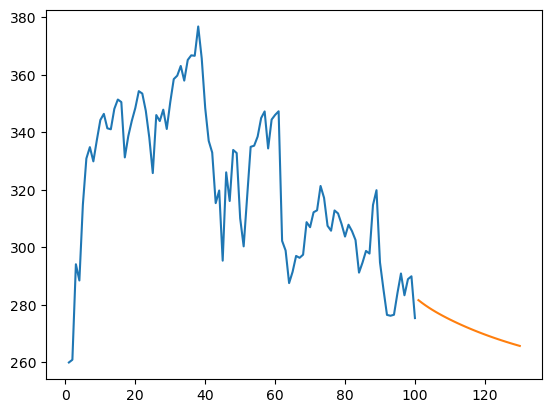

In [66]:
plt.plot(day_new,scaler.inverse_transform(tes1[2093:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


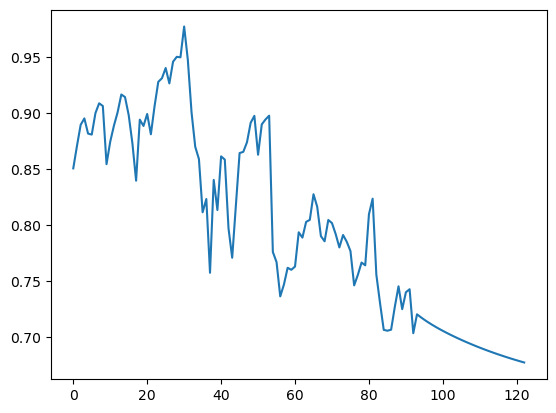

In [69]:
te3=tes1.tolist()
te3.extend(lst_output)
plt.plot(te3[2100:])
plt.show()

In [70]:
te3=scaler.inverse_transform(te3).tolist()


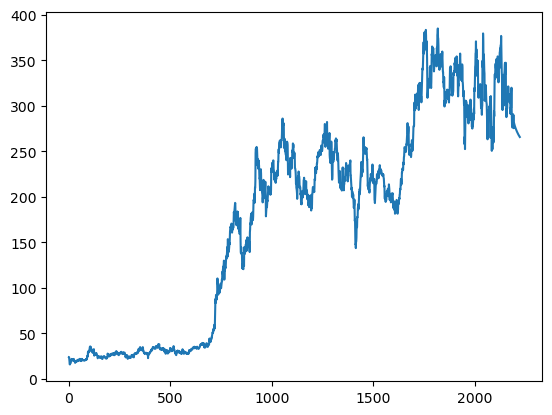

In [71]:
plt.plot(te3)
plt.show()